In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import scipy.io.wavfile as siowav
import IPython
from scipy.signal import find_peaks
import sounddevice as sd
import wavio as wv

In [2]:
rollno = 224
alpha = 1 + np.mod(rollno,4)

# Problem 1 - Plotting the signal spectra

In [80]:
# Defining a function to plot magnitude spectrum in dB and return fundamental frequency in Hz

def plot_mag_spectrum(signal, Fs, threshold, name):
    # Computing magnitude spectrum for positive frequencies
    mag_spectrum = abs(np.fft.rfft(signal))
    # Converting to dB scale
    dB = 20*np.log10(mag_spectrum[1:])
    # Finding peaks by thresholding
    peak_dB = np.zeros_like(dB)
    peak_dB[dB>threshold] = dB[dB>threshold]
    # Getting minimum amongst dominant peaks
    fundamental = np.min(find_peaks(peak_dB, distance=int(len(signal)/200))[0])
    # Getting fundamental frequency in Hz
    fundamental_Hz = fundamental*Fs/len(signal)
    Hz = Fs*(np.arange(1,1+int(len(signal)/2))/len(signal))
    
    plt.plot(Hz, dB)
    plt.plot(fundamental_Hz, dB[fundamental], 'o')
    plt.legend(['Magnitude in dB','Fundamental frequency = '+str(round(fundamental_Hz,2))+' Hz'], loc='upper right')
    plt.xlabel('Hz')
    plt.ylabel('d B')
    plt.title('Magnitude Spectrum of '+name)
    plt.ylim(0, 165)
    plt.subplots_adjust(hspace=0.4)
    
    return fundamental_Hz 

In [81]:
# Reading wavfiles for different instruments
Fs1, piano = siowav.read('piano1.wav')
Fs2, trumpet = siowav.read('trumpet1.wav')
Fs3, violin = siowav.read('violin1.wav')
Fs4, flute = siowav.read('flute1.wav')

# Normalizing signals by subtracting mean
piano = piano - np.mean(piano)
trumpet = trumpet - np.mean(trumpet)
violin = violin - np.mean(violin)
flute = flute - np.mean(flute)

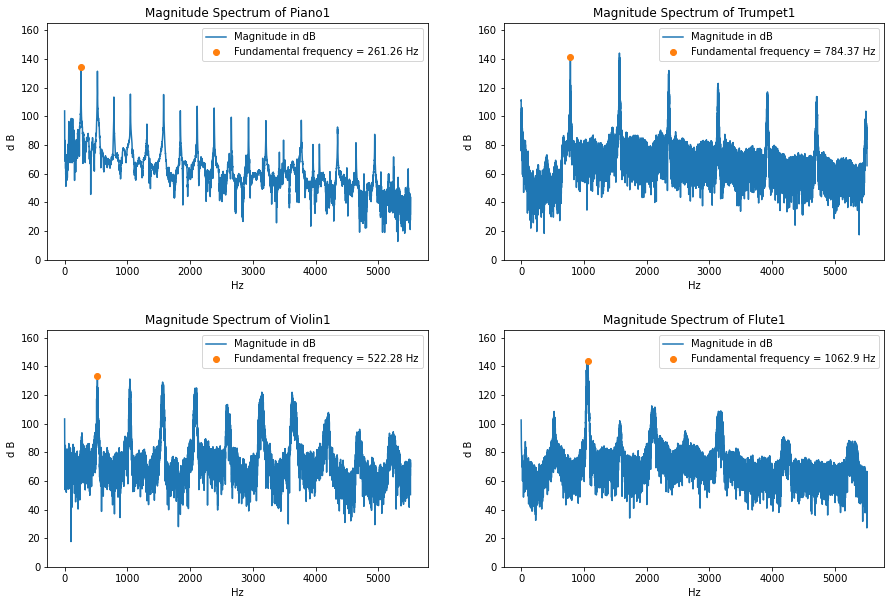

In [82]:
# Plotting magnitude spectrum in dB scale
plt.figure(figsize=(15,10))

plt.subplot(221)
piano1_fundamental = plot_mag_spectrum(piano, Fs1, 130, 'Piano1')
plt.subplot(222)
trumpet1_fundamental = plot_mag_spectrum(trumpet, Fs2, 130, 'Trumpet1')
plt.subplot(223)
violin1_fundamental = plot_mag_spectrum(violin, Fs3, 130, 'Violin1')
plt.subplot(224)
flute1_fundamental = plot_mag_spectrum(flute, Fs4, 130, 'Flute1')

plt.subplots_adjust(hspace=0.3)
plt.savefig('4_instruments.png')

In [83]:
# Reading other flute audio files
Fs5, flute2 = siowav.read('flute2.wav')
Fs6, flute3 = siowav.read('flute3.wav')
Fs7, flute4 = siowav.read('flute4.wav')

# Normalizing by subtracting mean
flute2 = flute2 - np.mean(flute2)
flute3 = flute3 - np.mean(flute3)
flute4 = flute4 - np.mean(flute4)

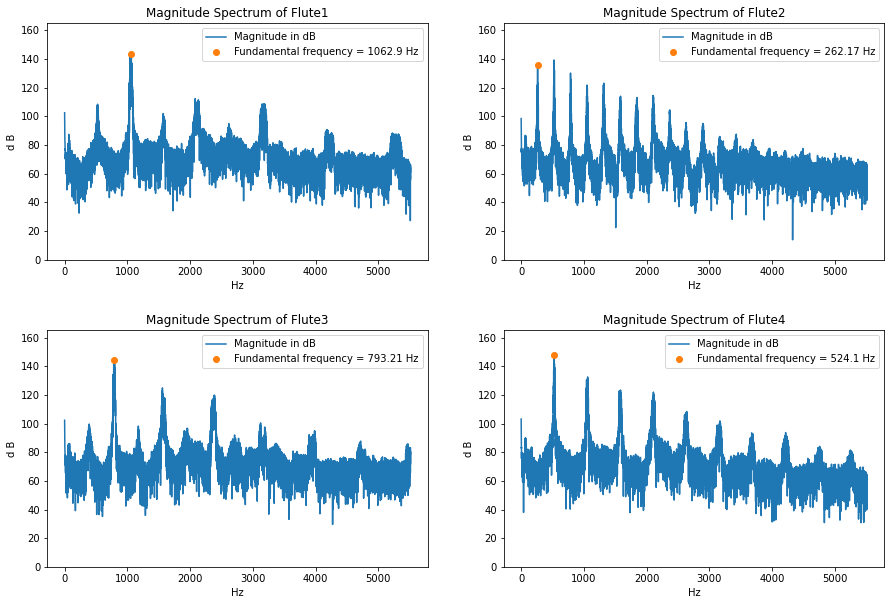

In [84]:
# Plotting magnitude spectrum in dB scale
plt.figure(figsize=(15,10))

thresh = 120
plt.subplot(221)
flute1_fundamental = plot_mag_spectrum(flute, Fs1, thresh, 'Flute1')
plt.subplot(222)
flute2_fundamental = plot_mag_spectrum(flute2, Fs5, thresh, 'Flute2')
plt.subplot(223)
flute3_fundamental = plot_mag_spectrum(flute3, Fs6, thresh, 'Flute3')
plt.subplot(224)
flute4_fundamental = plot_mag_spectrum(flute4, Fs7, thresh, 'Flute4')

plt.subplots_adjust(hspace=0.3)
plt.savefig('4_flutes.png')

In [9]:
# Getting the fundamental frequency amongst the flute signals which is closest to that of 'piano1.wav'
flute_fundamentals = [flute1_fundamental, flute2_fundamental, flute3_fundamental, flute4_fundamental]
beta = 1 + np.argmin(abs(piano1_fundamental-flute_fundamentals))
print('Beta is equal to '+str(beta))

Beta is equal to 2


# Problem 2 - Whistling Keylock

In [65]:
# Recording reference audio and making a backup
freq = 44100
duration = 3
reference = sd.rec(int(duration * freq), 
                   samplerate=freq, channels=1)
sd.wait()

siowav.write("reference.wav", freq, reference)

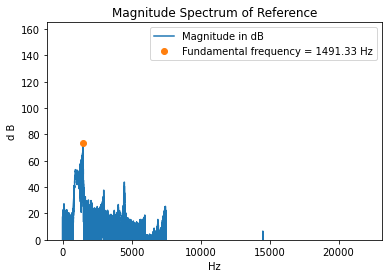

In [70]:
# Normalizing audio, plotting magnitude spectrum and obtaining fundamental frequency
freq, reference = siowav.read('reference.wav')
reference = reference - np.mean(reference)
reference_fundamental = plot_mag_spectrum(reference, freq, 70, 'Reference')

In [63]:
# Displaying reference audio
IPython.display.Audio(reference,rate=freq)

In [40]:
# Defining a function to record signal and grant access if the fundamental frequency matches the that of reference signal
def record_and_access():
    freq = 44100
    threshold = 70
    duration = 3
    recording = sd.rec(int(duration * freq), samplerate=freq, channels=1)
    sd.wait()
    
    fundamental = plot_mag_spectrum(recording, freq, threshold, 'Magnitude Spectrum of Recorded Signal')
    if fundamental <= 1.05*reference_fundamental and fundamental >= 0.95*reference_fundamental:
        print('ACCESS GRANTED')
    else:
        print('ACCESS DENIED')

ACCESS GRANTED


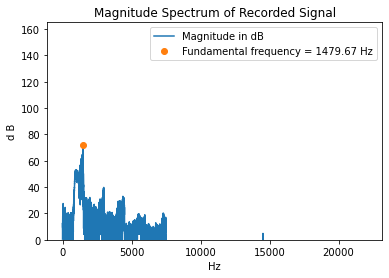

In [13]:
# Test Case 1
record_and_access()

ACCESS GRANTED


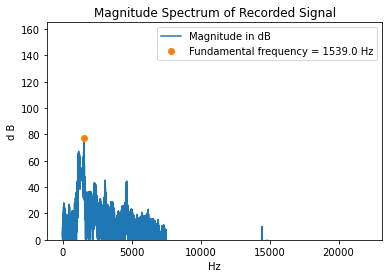

In [15]:
# Test Case 2
record_and_access()

ACCESS DENIED


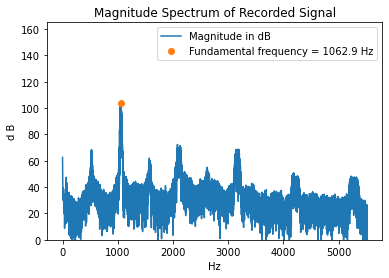

In [31]:
# Test Case 3
record_and_access()

ACCESS DENIED


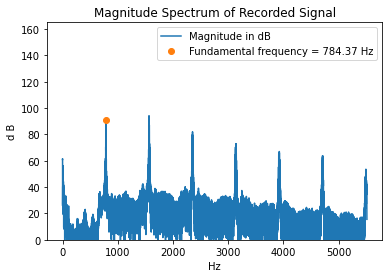

In [41]:
# Test Case 4
record_and_access()

# Problem 3 - Simultaneous Time and Frequency Representations

In [85]:
# Reading opera audio
Fs, opera = siowav.read('Opera.wav')
opera = opera - np.mean(opera)
IPython.display.Audio(opera,rate=Fs)

In [86]:
# Dividing into blocks of 20000 samples each
blocks = []
for i in range(0,11):
    blocks.append(opera[20000*i:20000*(i+1)])
len(blocks)

11

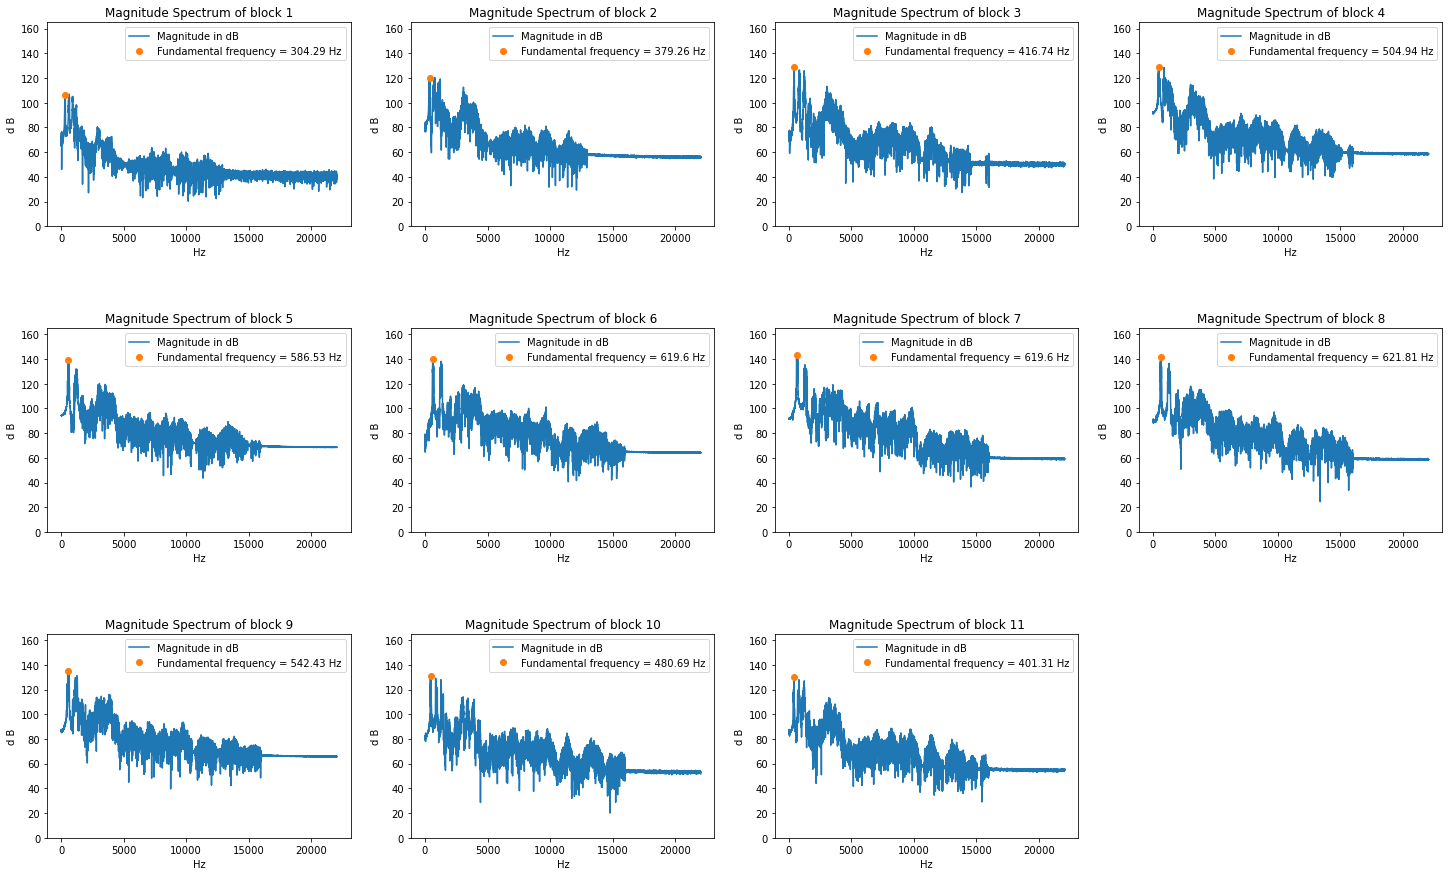

In [96]:
# Plotting magnitude spectrum of each block
fundamental_blocks = []
plt.figure(figsize=(25,15))
for i in range(len(blocks)):
    thresh = 100
    plt.subplot(3,4,i+1)
    fundamental_blocks.append(plot_mag_spectrum(blocks[i], Fs, thresh, 'block '+str(i+1)))
plt.subplots_adjust(hspace=0.5)
plt.savefig('11_blocks.png')

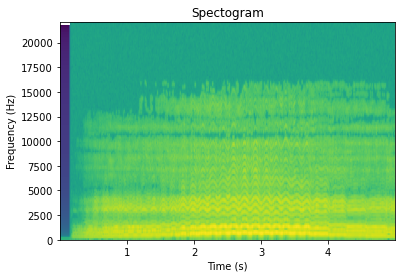

In [79]:
# Plotting spectogram
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(opera, Fs=Fs)

plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectogram')
plt.show()